In [5]:
pip install tensorflow_datasets

     ---------------------------------------- 5.4/5.4 MB 5.5 MB/s eta 0:00:00
     -------------------------------------- 126.4/126.4 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 101.5/101.5 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 3.0/3.0 MB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 223.6/223.6 kB 6.9 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=f00ea59d993c7205579ef6c4b12ce97de254c7f72e546397058395863ae962bd
  Stored in directory: c:\users\biank\appdata\local\pip\cache\wheels\e1\e8\83\ddea66100678d139b14bc87692ece57c6a2a937956d2532608
Successfully built promise
Note: you may need to restart the kernel to use updated packages.


In [6]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras as keras

import numpy as np
import matplotlib.pyplot as plt

In [7]:
# Hyper Parameter Configuration
EPOCHS = 5
BATCH_SIZE = 32

In [8]:
(ds_train, ds_test), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    # shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\biank\tensorflow_datasets\rock_paper_scissors\3.0.0.incompleteTTQJZ9\rock_paper_scissors-tr…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\biank\tensorflow_datasets\rock_paper_scissors\3.0.0.incompleteTTQJZ9\rock_paper_scissors-te…

Dataset rock_paper_scissors downloaded and prepared to C:\Users\biank\tensorflow_datasets\rock_paper_scissors\3.0.0. Subsequent calls will reuse this data.


In [9]:
# print(ds_info)
image_shape = ds_info.features['image'].shape
image_dtype = ds_info.features['image'].dtype

print(f'image shape: {image_shape}')
print(f'image dtype: {image_dtype}')

image shape: (300, 300, 3)
image dtype: <dtype: 'uint8'>


In [10]:
# print(ds_train)
num_train = ds_info.splits['train'].num_examples
print(f'num of train: {num_train}')

# print(ds_test)
num_test = ds_info.splits['test'].num_examples
print(f'num of test : {num_test}')

num of train: 2520
num of test : 372


In [11]:
CLASS_NUM = ds_info.features['label'].num_classes # = 3
CLASS_NAMES = ['rock', 'paper', 'scissors']

print(f'num of class: {CLASS_NUM}\n')

for i in range(CLASS_NUM):
    print(i, CLASS_NAMES[i])

num of class: 3

0 rock
1 paper
2 scissors


scissors


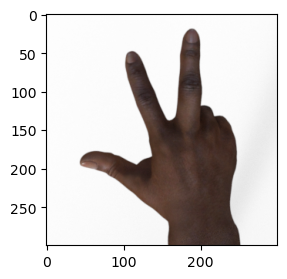

In [12]:
plt.figure(figsize=(3, 3))

for image, label in ds_train.take(1):
    plt.imshow(image)
    print(CLASS_NAMES[label.numpy()])

scissors
scissors


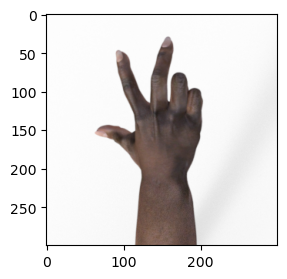

In [13]:
plt.figure(figsize=(3, 3))

for image, label in ds_train.take(2):
    plt.imshow(image)
    print(CLASS_NAMES[label.numpy()])

scissors
scissors
rock


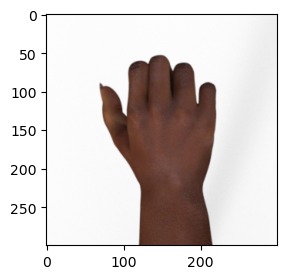

In [14]:
plt.figure(figsize=(3, 3))

for image, label in ds_train.take(3):
    plt.imshow(image)
    print(CLASS_NAMES[label.numpy()])

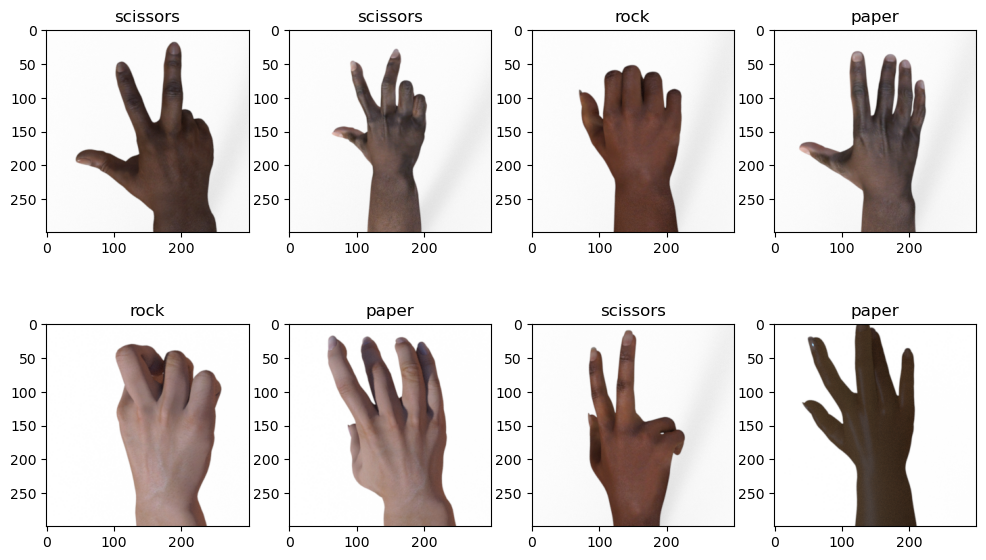

In [15]:
plt.figure(figsize=(12, 7))

i = 1
for image, label in ds_train.take(8):
    plt.subplot(2, 4, i)
    i += 1
    # plt.axis('Off')
    label = CLASS_NAMES[label.numpy()]
    plt.title(f'{label}')
    plt.imshow(image)

In [16]:
# 이후에 batch size 설정 이후 데이터를 하나씩 꺼낼 수 없기 때문에,
# 미리 test set의 첫 번째 데이터를 꺼내어 변수에 저장

for image, label in ds_test.take(1):
    test_image0 = image.numpy()
    test_label0 = label.numpy()

In [17]:
INPUT_IMG_SIZE = 100

def normalize_img(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [18]:
ds_train = ds_train.map(normalize_img,
                        num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(num_train)
ds_train = ds_train.batch(BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_test = ds_test.map(normalize_img,
                      num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_test = ds_test.batch(BATCH_SIZE)
ds_test = ds_test.cache()
ds_test = ds_test.prefetch(tf.data.experimental.AUTOTUNE)

In [41]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu',
                              input_shape=(INPUT_IMG_SIZE, INPUT_IMG_SIZE, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(515, activation='relu'))
model.add(keras.layers.Dropout(0,5))
model.add(keras.layers.Dense(CLASS_NUM, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 50, 50, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 25, 25, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 25, 25, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 12, 12, 32)      

In [42]:
keras.utils.plot_model(model, show_shapes=True, dpi = 70)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [43]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(ds_train, epochs=EPOCHS, validation_data = ds_test)

Epoch 1/5
79/79 [==============================] - 11s 127ms/step - loss: 1.1000 - accuracy: 0.3591 - val_loss: 1.0958 - val_accuracy: 0.4839
Epoch 2/5
79/79 [==============================] - 11s 138ms/step - loss: 1.0858 - accuracy: 0.4036 - val_loss: 1.0902 - val_accuracy: 0.4140
Epoch 3/5
79/79 [==============================] - 11s 139ms/step - loss: 1.0705 - accuracy: 0.4663 - val_loss: 1.0825 - val_accuracy: 0.3360
Epoch 4/5
79/79 [==============================] - 11s 144ms/step - loss: 1.0399 - accuracy: 0.5254 - val_loss: 1.0463 - val_accuracy: 0.6855
Epoch 5/5
79/79 [==============================] - 12s 146ms/step - loss: 0.9436 - accuracy: 0.5913 - val_loss: 0.9501 - val_accuracy: 0.6882


In [45]:
test_loss, test_acc = model.evaluate(ds_test, verbose=2)

print(f'\n테스트 정확도: {test_acc*100:.2f}%')

12/12 - 0s - loss: 0.9501 - accuracy: 0.6882 - 393ms/epoch - 33ms/step

테스트 정확도: 68.82%


In [46]:
predictions = model.predict(ds_test)

print(predictions)
print(len(predictions))

12/12 [==============================] - 1s 79ms/step
[[0.3617669  0.19965865 0.4385745 ]
 [0.14450023 0.5183065  0.33719328]
 [0.36356527 0.2175005  0.41893423]
 ...
 [0.5434707  0.16401076 0.29251856]
 [0.28989854 0.26974517 0.4403563 ]
 [0.34784558 0.2453274  0.40682697]]
372


In [47]:
print(predictions[0])

[0.3617669  0.19965865 0.4385745 ]


In [48]:
CLASS_NAMES[np.argmax(predictions[0])]

'scissors'

scissors


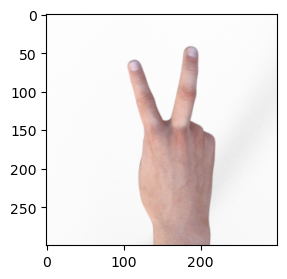

In [49]:
plt.figure(figsize=(3, 3))

plt.imshow(test_image0)
print(CLASS_NAMES[test_label0])

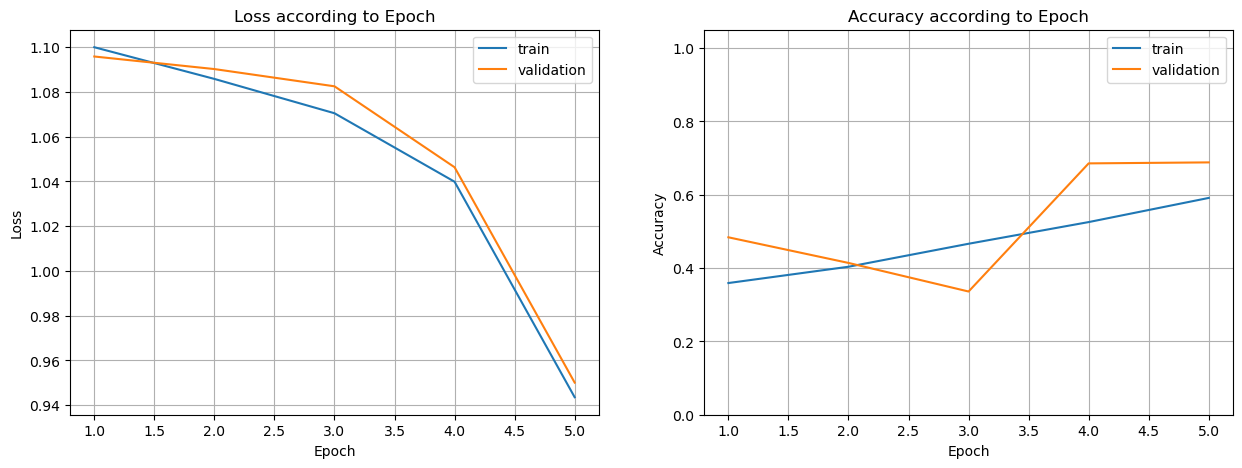

In [50]:
import pandas as pd

df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = range(1, EPOCHS+1)

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt.title('Loss according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(df_hist['epoch'], df_hist['loss'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_loss'], label = 'validation')
# plt.ylim([0, 1.5])
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.title('Accuracy according to Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(df_hist['epoch'], df_hist['accuracy'], label='train')
plt.plot(df_hist['epoch'], df_hist['val_accuracy'], label='validation')
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()

plt.show()